In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data and remove outlieres

In [197]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

In [198]:
# Remove outliers in 'price_per_night' using the IQR method
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'price_per_night' is an outlier
df = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

df

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,Free_cancellation,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
0,14:43.1,06/07/2024,07/07/2024,Omni Berkshire Place,1,1,9.290000,1223,269,299,...,0,0,0,0,3,4.0,9.600000,Midtown East,1.1,Midtown Manhattan
1,14:43.1,06/07/2024,07/07/2024,The Washington by LuxUrban,1,1,8.280000,1006,188,209,...,1,0,0,0,6,4.0,9.400000,Manhattan,7.1,Other Manhattan
2,14:43.2,06/07/2024,07/07/2024,Hyatt Grand Central New York,1,1,8.080000,3726,246,289,...,0,0,0,0,11,4.0,9.306447,Midtown East,1.9,Midtown Manhattan
3,14:43.2,06/07/2024,07/07/2024,"The Cloud One New York-Downtown, by the Motel ...",1,1,8.880000,625,189,0,...,0,0,0,0,12,4.0,8.900000,Manhattan,7.0,Other Manhattan
4,14:43.2,06/07/2024,07/07/2024,45 Times Square Hotel,1,1,8.680000,1268,270,300,...,0,0,0,1,13,3.0,9.600000,Manhattan,1.2,Other Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43918,42:19.2,25/07/2024,30/07/2024,The Maritime Hotel,30,5,9.490000,1015,311,359,...,1,0,0,0,242,4.0,9.600000,Chelsea,3.4,Midtown Manhattan
43919,42:19.3,25/07/2024,30/07/2024,Doxie Hotel,30,5,8.770833,760,197,0,...,0,0,0,0,244,2.0,9.445409,Manhattan,1.7,Other Manhattan
43920,42:19.4,25/07/2024,30/07/2024,The Herald by LuxUrban,30,5,8.080000,224,255,284,...,1,0,0,1,247,3.0,9.600000,Manhattan,2.0,Other Manhattan
43921,42:19.4,25/07/2024,30/07/2024,AC Hotel by Marriott New York Times Square,30,5,9.090000,1001,268,0,...,0,0,0,0,248,4.0,9.445409,Manhattan,1.6,Other Manhattan


In [199]:
df["full_price"] = df["price_per_night"] * df["LOS"]
df[["full_price", "price_per_night", "LOS"]]

,full_price,price_per_night,LOS
0,269,269,1
1,188,188,1
2,246,246,1
3,189,189,1
4,270,270,1
...,...,...,...
43918,1555,311,5
43919,985,197,5
43920,1275,255,5
43921,1340,268,5


In [166]:
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category', 'full_price'],
      dtype='object')

In [136]:
# columns_to_impute = ['score', 'star_rating', 'km_from_center']

# # Function to fill NaN values with the mean of the column
# def fill_na_with_mean(df, columns):
#     for column in columns:
#         mean_value = df[column].mean()
#         df[column].fillna(mean_value, inplace=True)
#     return df

# df = fill_na_with_mean(df, columns_to_impute)

# df["neighborhood_category"].fillna("Unknown/Other", inplace=True)

In [137]:
# Function to fill NaN values with the mean of the group
# def fill_na_with_group_mean(df):
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
#     for col in numeric_cols:
#         df[col].fillna(df[col].mean(), inplace=True)
#     return df

# # Fill NaN values for the entire dataset
# df = fill_na_with_group_mean(df)

C:\Users\User\AppData\Local\Temp\ipykernel_17144\2750893537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [138]:
# Function to fill NaN values with the mean of the group
# def fill_na_with_group_mean(df):
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
#     for col in numeric_cols:
#         df[col].fillna(df[col].mean(), inplace=True)
#     return df

# Run linear regression to predict the price per night 

Linear Regression Results:
Train R2: 0.11886365534401688
Train RMSE: 47.17172890681436
Train MSE: 2225.1720080579853
Train MAE: 37.296864050797446
Test R2: 0.1117633393445151
Test RMSE: 47.85070557077665
Test MSE: 2289.6900236211554
Test MAE: 37.70093693763016


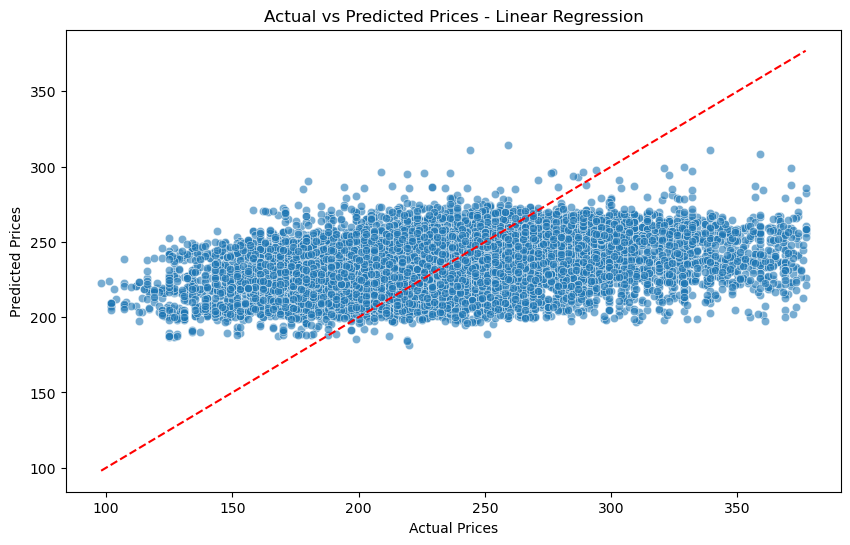

In [184]:
# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'price_per_night',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']

df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [157]:
print('Train Size',len(X_train))
print('Test Size',len(X_test))

Train Size 29299
Test Size 12557


# feature engineering process:
We adding new columns that describes the period of time in a month, and which days in a week are appear for each hotel - using one hot encoding method

In [200]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# df = pd.concat([df1, df2, df3], ignore_index=True)

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')


# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)

# Save the updated DataFrame to a new CSV file
# output_file = './05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv'
# df.to_csv(output_file, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_17144\1617303282.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')


             Snapshot  start_date    end_date  \
0 2024-07-12 14:43:06  06/07/2024  07/07/2024   
1 2024-07-12 14:43:06  06/07/2024  07/07/2024   
2 2024-07-12 14:43:12  06/07/2024  07/07/2024   
3 2024-07-12 14:43:12  06/07/2024  07/07/2024   
4 2024-07-12 14:43:12  06/07/2024  07/07/2024   

                                                name  TTT  LOS  score  \
0                               Omni Berkshire Place    1    1   9.29   
1                         The Washington by LuxUrban    1    1   8.28   
2                       Hyatt Grand Central New York    1    1   8.08   
3  The Cloud One New York-Downtown, by the Motel ...    1    1   8.88   
4                              45 Times Square Hotel    1    1   8.68   

   reviews  price_per_night  original_price  ...  checkout_day_name_Monday  \
0     1223              269             299  ...                       0.0   
1     1006              188             209  ...                       0.0   
2     3726              246     

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [190]:
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category', 'full_price', 'checkin',
       'checkout', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of th

# Linear reggresion with feature engineering to predict price per night

Linear Regression Results:
Train R2: 0.1775551504740862
Train RMSE: 45.5736307290967
Train MSE: 2076.9558178320667
Train MAE: 35.956586553511606
Test R2: 0.16800154441075665
Test RMSE: 46.31111730848318
Test MSE: 2144.7195863600905
Test MAE: 36.506481687820056


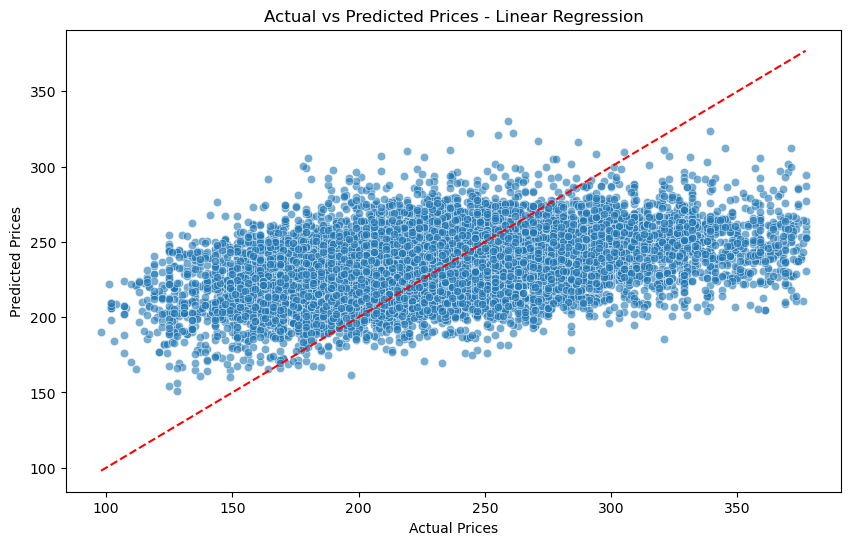

In [191]:
# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'price_per_night',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center',
       'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Run the model to predict full price: 

Linear Regression Results:
Train R2: 0.8370670744827258
Train RMSE: 148.1024528906233
Train MSE: 21934.336552219294
Train MAE: 108.42812084002433
Test R2: 0.8409283381243204
Test RMSE: 147.55675600248298
Test MSE: 21772.996241976296
Test MAE: 107.59836315841281


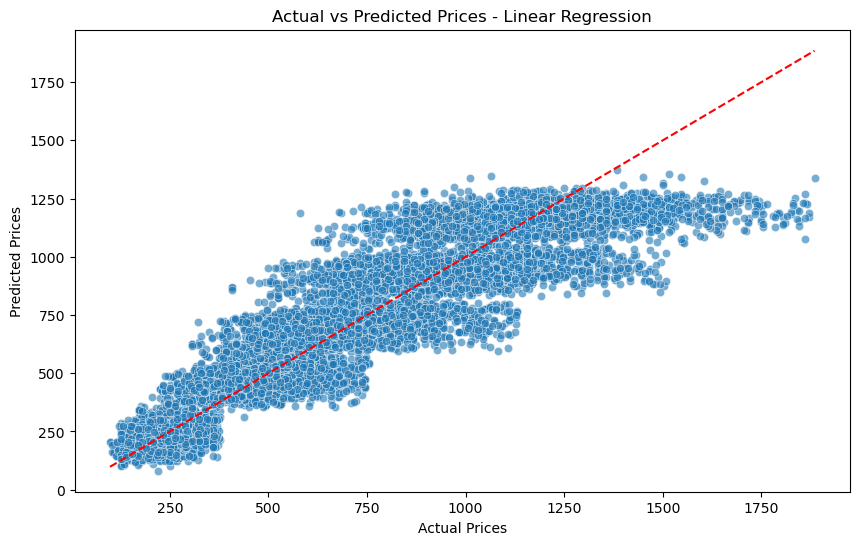

In [196]:
# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']

df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Run the model to predict price full price after feature engineering:

Linear Regression Results:
Train R2: 0.8481427612306502
Train RMSE: 142.98009229667474
Train MSE: 20443.30679316563
Train MAE: 105.26144221066707
Test R2: 0.8497887124785968
Test RMSE: 143.38838523285426
Test MSE: 20560.22901968542
Test MAE: 105.40242510890171


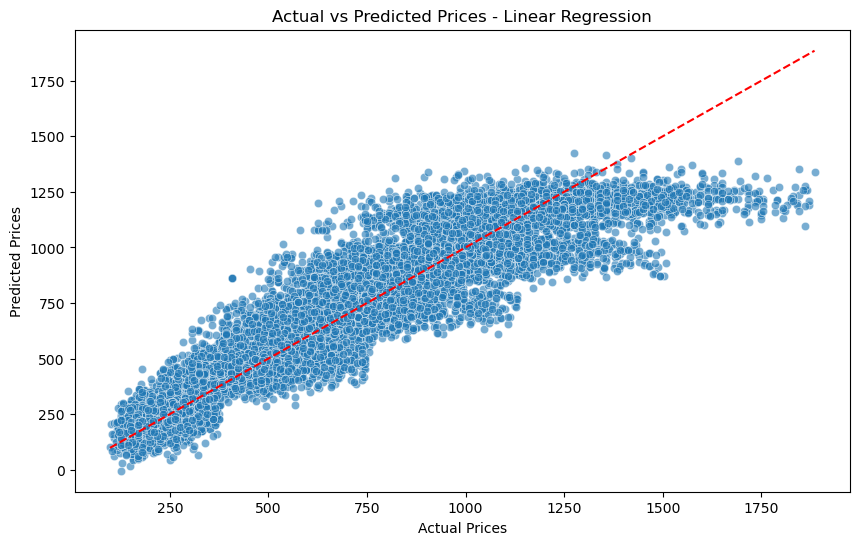

In [201]:
# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center',
       'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()